# GeoParse text

First initialize the geoparser by giving the high and low area threshold in km2. 
Then you can parse a list of str and find the locations in the text. It returns the polygon, name and area of the spatial entities found. 

In [1]:
from geoparsing import OSMGeoParser, safe_join

geoparser = OSMGeoParser(100, 90000)
gdf = geoparser.osm_research(['Marseille', 'Lyon', 'Pointe Rouge', 'les Goudes', 'Stade Vélodrome'],\
     union=False)
     

[nominatim] downloading data: search
[nominatim] downloading data: search
[nominatim] downloading data: search
[nominatim] downloading data: search
[nominatim] downloading data: search
[nominatim] downloading data: search


France
├── 13008
│   ╰── France métropolitaine
│       ╰── Provence-Alpes-Côte d'Azur
│           ╰── Bouches-du-Rhône
│               ╰── Marseille
│                   ╰── 8e Arrondissement
│                       ├── Saint-Giniez
│                       │   ╰── Boulevard Michelet
│                       │       ╰── 3
│                       │           ╰── Orange Vélodrome
│                       ╰── Les Goudes
├── France métropolitaine
│   ╰── Auvergne-Rhône-Alpes
│       ╰── Rhône
│           ╰── Métropole de Lyon
│               ╰── Lyon
╰── 13000
    ╰── France métropolitaine
        ╰── Provence-Alpes-Côte d'Azur
            ╰── Bouches-du-Rhône
                ╰── Marseille
Canada
╰── Québec
    ╰── Côte-Nord
        ╰── Sept-Rivières
            ╰── Sept-Îles
                ╰── Pointe Rouge


[nominatim] downloading data: search
[nominatim] downloading data: search


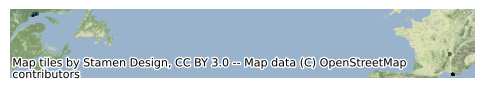

In [2]:
import contextily as cx
# gdf.plot(column='name', legend=True, alpha=0.5)

df_wm = gdf.to_crs(epsg=3857)
ax = df_wm.plot(figsize=(6,6),alpha=0.5, edgecolor='k', column='name')
ax.set_axis_off()
cx.add_basemap(ax)
import matplotlib.pyplot as plt
plt.savefig('ex.png', transparent=True)

# GeoParse DataFrame

In [3]:
import pandas as pd
dfde = pd.read_csv('/Users/arthurcalvi/Data/Disturbances_maps/DFDE_export.csv')
dfde = dfde[ (dfde['end_year'] < 2021) & (dfde['start_year'] > 1986) & (dfde['estimated'] == 0)]
dfde.sort_index(inplace=True)
dfde.head(20)

/var/folders/1c/h8t9_vd53gsgz_wm9kswm8wm0000gp/T/ipykernel_2668/2492363385.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfde = pd.read_csv('/Users/arthurcalvi/Data/Disturbances_maps/DFDE_export.csv')


,id,internal_id,parent_id,not_event,estimated,start_year,day,month,end_year,area,...,number,overbark,reference,reference_long,notes,status,cause,species,country,location
3170,308,13101,NaN,0,0,1987,NaN,NaN,1987,NaN,...,15.0,NaN,BENOIT DE COIGNAC 1996,"BENOIT DE COIGNAC G., 1996, ""la prévention des...",Number of fires larger than 100 ha and its sha...,NaN,Fire,NaN,France,Republic of France(FR)
3171,334,7740,NaN,0,0,1987,NaN,NaN,1987,202.0,...,NaN,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...",Brushwood,NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3172,335,7741,NaN,0,0,1987,NaN,NaN,1987,277.0,...,NaN,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...",Maquis,NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3173,336,7742,NaN,0,0,1987,NaN,NaN,1987,572.0,...,NaN,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...",Garrigue,NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3174,337,7743,NaN,0,0,1987,NaN,NaN,1987,682.0,...,NaN,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...","Others (pasture land, abandonded agricultural ...",NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3175,357,7763,NaN,0,0,1987,NaN,NaN,1987,3409.0,...,81.0,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...",On karst,NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3176,394,7800,NaN,0,0,1987,NaN,NaN,1987,3535.0,...,171.0,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...",Forest fires,NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3177,567,5483,NaN,0,0,1987,NaN,NaN,1988,130.0,...,NaN,NaN,Baier 2000,"Baier, U. (2000). “Waldschutzsituation 1999/20...",Damaged area in winter 1987/1988,NaN,Mice,NaN,Germany,Mühlhausen/Thüringen(DE)
3178,586,5502,NaN,0,0,1987,NaN,NaN,1987,20.0,...,NaN,NaN,Baier 2000,"Baier, U. (2000). “Waldschutzsituation 1999/20...",Damaged area in summer,NaN,Mice,NaN,Germany,Mühlhausen/Thüringen(DE)
3179,1139,13066,NaN,0,0,1987,NaN,NaN,1987,10392.0,...,2116.0,NaN,Chevrou R. 1998,"Chevrou, R., 1998. Prévention et lutte contre ...",'Provence-Alpes-Côte d'Azur; Auvergne-Rhône-Al...,NaN,Fire,NaN,France,Republic of France(FR)


The inputs needed are :
- Pandas DataFrame
- columns : a list of the names of the columns of the DataFrame on which to perform the geoparsing, ex : ['location', 'country']
- wrapper : a func to add preprocessing or condition to perform the geoparsing
- union : False (to be deprecated)
- root_in : if the location to find should be in a country, and that the country is mentionned in a column, then give the name of that column here. It will check if the location is in this country before returning the polygon

In [12]:
#Retrieve texts of all events + ponctuation removing 
def wrapper_safe_join(row, columns=list):
    if len(row.country.split(';')) < 4:
        return safe_join(row, columns=columns)
    else :
        return ''


country = 'france'
dfde_fr = dfde[ dfde.country.str.lower().str.contains(country) ]
print(dfde_fr.shape)

gdf = geoparser.from_dataframe(dfde_fr, columns=['location', 'country', 'notes'],\
     wrapper=wrapper_safe_join, union=False, root_in='country')

(1052, 22)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1052 out of 1052 | elapsed:  3.9min finished


conversion rate : 67.21%


In [14]:
import fiona
import os 

out_dir = '/Users/arthurcalvi/Documents/PhD/Data/DFDE_V0/' 
columns = ['id', 'start_year', 'end_year', 'day', 'month', \
    'cause', 'area', 'volume', 'percentage', 'number', 'species', 'notes', 'country',\
         'location', 'name', 'geometry', 'area_km', 'reference', 'reference_long']
gdf.start_year = pd.to_datetime(gdf.start_year, format='%Y').apply(str)
gdf.end_year = pd.to_datetime(gdf.end_year, format='%Y').apply(str)

a = os.path.join(out_dir, 'shapefile', 'france.shp')
b = os.path.join(out_dir, 'geojson', 'france.geojson')

for x in [a,b]:
    os.makedirs(os.path.dirname(x), exist_ok=True)
    
gdf[columns].to_file(a)
gdf[columns].to_file(b)

FionaCPLError: The wrapped function returned an error code, but no error message was set.